In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
w= pd.read_excel("wCon-feb-july20.xlsx")
w['Contrast']=1   #add a column of 1 to clarify it's with contrast
# wo=pd.read_excel("CT-woC.xlsx")
# wo['Contrast']=0  #add a column of 0 to clarify it's without contrast
w.head(2)

,Patient Class,Order Status,Order ID,Procedure,Ordering Provider,Order Date,Age of Order,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Patient Facility,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
0,NaN,NaN,346106211,CT Abdomen Pelvis with and without contrast,John Thomas Martin,2022-02-09,161d 01h 21m,NaN,GV PRMCRE [1053001170],Outpatient,NaN,Primary Care,NaN,GOUVERNEUR HEALTHCARE,NaN,NaN,1
1,NaN,Completed,346498903,CT Chest with contrast,Nicholas Sanchez,2022-02-09,161d 00h 46m,NaN,BE PRMCRE [1020001170],Outpatient,NaN,Primary Care,NaN,BELLEVUE HOSPITAL CENTER,CT Chest with and without contrast,NaN,1


In [ ]:
#Number of not N/As in each column of with contrast dataset
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72163 entries, 0 to 72162
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient Class            69455 non-null  object        
 1   Order Status             67112 non-null  object        
 2   Order ID                 72163 non-null  int64         
 3   Procedure                72163 non-null  object        
 4   Ordering Provider        72163 non-null  object        
 5   Order Date               72163 non-null  datetime64[ns]
 6   Age of Order             72163 non-null  object        
 7   Accession #              50828 non-null  object        
 8   Ordering Dept            72163 non-null  object        
 9   Patient Class 2          72163 non-null  object        
 10  Study Status             45966 non-null  object        
 11  Dept Specialty           64201 non-null  object        
 12  Patient Facility         60273 n

In [ ]:
df= w#.append(wo, ignore_index=True)  #appending 2 dataframes to 1 dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72163 entries, 0 to 72162
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient Class            69455 non-null  object        
 1   Order Status             67112 non-null  object        
 2   Order ID                 72163 non-null  int64         
 3   Procedure                72163 non-null  object        
 4   Ordering Provider        72163 non-null  object        
 5   Order Date               72163 non-null  datetime64[ns]
 6   Age of Order             72163 non-null  object        
 7   Accession #              50828 non-null  object        
 8   Ordering Dept            72163 non-null  object        
 9   Patient Class 2          72163 non-null  object        
 10  Study Status             45966 non-null  object        
 11  Dept Specialty           64201 non-null  object        
 12  Patient Facility         60273 n

In [ ]:
#Number of N\As in the appended dataset (before preprocessing)
df.isna().sum()

Patient Class               2708
Order Status                5051
Order ID                       0
Procedure                      0
Ordering Provider              0
Order Date                     0
Age of Order                   0
Accession #                21335
Ordering Dept                  0
Patient Class 2                0
Study Status               26197
Dept Specialty              7962
Patient Facility           11890
Order Revenue Location         0
Previous Procedure Name    68036
Addendum Text              27753
Contrast                       0
dtype: int64

There are 76503 N/As in **Previous Procedure Name** column, so I decided to remove it. 

In [ ]:

print("Number of Procedures: ", df['Procedure'].nunique())
print("Order Dates go from day", min(df['Order Date']), "to day", max(df['Order Date']), ", a total of", df['Order Date'].nunique(), "days")

Number of Procedures:  237
Order Dates go from day 2022-02-01 00:00:00 to day 2022-07-20 00:00:00 , a total of 170 days


In [ ]:
# # Time conversion
# def time(let, cont):
#   if len(let)>= 9:
#     o_time= let[]

# Based on orde status


In [ ]:
wos = w[w['Order Status'].notna()]  #remove nulls
#Completed class
wos_can= wos[wos["Order Status"].str.contains("Canceled")==True]
#Canceled class
wos_com= wos[wos["Order Status"].str.contains("Completed")==True]
#Sent class
wos_sent= wos[wos["Order Status"].str.contains("Sent")==True]
#wos_sent.info()

In [ ]:
wos_sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 657 to 72162
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient Class            548 non-null    object        
 1   Order Status             552 non-null    object        
 2   Order ID                 552 non-null    int64         
 3   Procedure                552 non-null    object        
 4   Ordering Provider        552 non-null    object        
 5   Order Date               552 non-null    datetime64[ns]
 6   Age of Order             552 non-null    object        
 7   Accession #              217 non-null    object        
 8   Ordering Dept            552 non-null    object        
 9   Patient Class 2          552 non-null    object        
 10  Study Status             95 non-null     object        
 11  Dept Specialty           475 non-null    object        
 12  Patient Facility         434 non

In [ ]:
#Completed
print("*******************   COMPLETED  ********************")
print('There are',(wos_com['Patient Class 2']=='Inpatient').sum(),'inpatients in Completed class')
print('There are',(wos_com['Patient Class 2']=='Outpatient').sum(),'outpatient in Completed class')
print('There are',(wos_com['Patient Class 2']=='Emergency').sum(),'emergencies in Completed class')
print("*******************   CANCELED  ********************")
#Canceled
print('There are',(wos_can['Patient Class 2']=='Inpatient').sum(),'inpatients in Canceled class')
print('There are',(wos_can['Patient Class 2']=='Outpatient').sum(),'outpatient in Canceled class')
print('There are',(wos_can['Patient Class 2']=='Emergency').sum(),'emergencis in Canceled class')

#Sent
print("*******************  SENT   ********************")
print('There are',(wos_sent['Patient Class 2']=='Inpatient').sum(),'inpatients in Sent class')
print('There are',(wos_sent['Patient Class 2']=='Outpatient').sum(),'outpatients in Sent class')
print('There are',(wos_sent['Patient Class 2']=='Emergency').sum(),'emergencies in Sent class')

*******************   COMPLETED  ********************
There are 7197 inpatients in Completed class
There are 11879 outpatient in Completed class
There are 30246 emergencies in Completed class
*******************   CANCELED  ********************
There are 6108 inpatients in Canceled class
There are 2658 outpatient in Canceled class
There are 8472 emergencis in Canceled class
*******************  SENT   ********************
There are 102 inpatients in Sent class
There are 350 outpatients in Sent class
There are 100 emergencies in Sent class


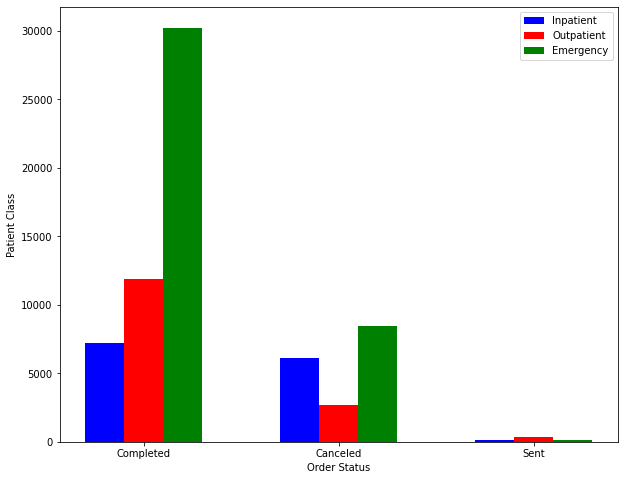

In [ ]:
# create data
x = np.arange(3)
y1 = [7197, 6108 , 102]
y2 = [11879, 2658 , 350]
y3 = [30246 , 8472 , 100]
width = 0.2
  
# plot data in grouped manner of bar type
plt.subplots(figsize=(10, 8))
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='red')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Completed', 'Canceled', 'Sent'])
plt.xlabel("Order Status")
plt.ylabel("Patient Class")
plt.legend(["Inpatient", "Outpatient", "Emergency"])
plt.savefig("order stat bar chart")
plt.show()

In [ ]:
#CT Abdomen Pelvis with Omnipaque
(wos_can['Procedure']=='CT Angio Chest with Omnipaque').sum()

631

In [ ]:
w_proc=wos_com.groupby('Procedure')['Contrast'].agg(['count'])
w_pro=w_proc.reset_index('Procedure')
w_pro.sort_values('count',ascending=False,inplace=True)
w_pro.head(5)

,Procedure,count
2,CT Abdomen Pelvis with Omnipaque,12509
4,CT Abdomen Pelvis with contrast,7788
89,CT Chest with contrast,3592
63,CT Angio Pulmonary Embolism with Omnipaque,3454
87,CT Chest with Omnipaque,3119


In [ ]:
w_proc=wos_can.groupby('Procedure')['Order Status'].agg(['count'])
w_pro=w_proc.reset_index('Procedure')
w_pro.sort_values('count',ascending=False,inplace=True)
w_pro.head(8)

,Procedure,count
2,CT Abdomen Pelvis with Omnipaque,2744
4,CT Abdomen Pelvis with contrast,1705
3,CT Abdomen Pelvis with and without contrast,906
87,CT Chest with Omnipaque,810
63,CT Angio Pulmonary Embolism with Omnipaque,727
1,CT Abdomen Pelvis with + without Omnipaque,654
30,CT Angio Chest with Omnipaque,631
89,CT Chest with contrast,547


In [ ]:
w_proc=wos_sent.groupby('Procedure')['Order Status'].agg(['count'])
w_pro=w_proc.reset_index('Procedure')
w_pro.sort_values('count',ascending=False,inplace=True)
w_pro.head(8)

,Procedure,count
4,CT Abdomen Pelvis with contrast,98
3,CT Abdomen Pelvis with and without contrast,64
49,CT Chest with contrast,64
2,CT Abdomen Pelvis with Omnipaque,55
23,CT Angio Coronary with 3D with contrast,24
72,CT Soft Tissue Neck with contrast,19
34,CT Angio Neck with Omnipaque,15
8,CT Abdomen with contrast,15


In [ ]:
#Here we are encoding our catagorical variables and keep the price and odometer as they were
lei = preprocessing.LabelEncoder()
wos_com_en=wos_com.apply(lei.fit_transform)
wos_com_en.loc[:, ['Order ID', 'Order Date','Age of Order','Contrast']] = wos_com[['Order ID', 'Order Date','Age of Order','Contrast']]
wos_com_en.head(2)

,Patient Class,Order Status,Order ID,Procedure,Ordering Provider,Order Date,Age of Order,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Patient Facility,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
1,14,0,346498903,89,3268,2022-02-09,161d 00h 46m,44440,60,2,2,56,12,0,114,12,1
2,14,0,348151838,26,4049,2022-02-01,168d 23h 37m,44440,50,2,2,35,12,0,63,12,1


In [ ]:
#Building a dataframe based on date (each col shows the recurrence at each day) good for plotting binary vars
df_date=wos_com_en.groupby([wos_com_en['Order Date'].dt.date]).sum()
df_da=df_date.reset_index('Order Date')
df_da.head()

,Order Date,Patient Class,Order Status,Order ID,Procedure,Ordering Provider,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Patient Facility,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
0,2022-02-01,2683,0,148684833386,17590,1034151,11490592,113806,386,555,13106,2964,7060,85136,2136,450
1,2022-02-02,2690,0,153126652741,18995,1113861,11331547,120701,377,551,12994,2888,7504,90009,2058,465
2,2022-02-03,2676,0,153026393590,18408,1021046,11531520,117851,415,552,14149,2952,7397,87038,2240,462
3,2022-02-04,2405,0,147479577087,18088,993980,10732559,116489,348,506,12525,2750,7342,85341,1822,441
4,2022-02-05,858,0,77731143243,10159,533912,5000164,63200,42,239,5282,1245,4037,47016,264,238


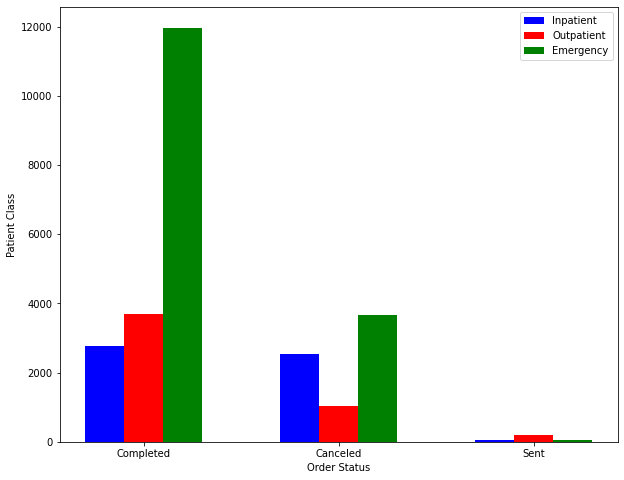

In [ ]:
# create data
x = np.arange(3)
y1 = [2761, 2541 , 47]
y2 = [3697, 1046 , 186]
y3 = [11970 , 3674 , 42]
width = 0.2
  
# plot data in grouped manner of bar type
plt.subplots(figsize=(10, 8))
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='red')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Completed', 'Canceled', 'Sent'])
plt.xlabel("Order Status")
plt.ylabel("Patient Class")
plt.legend(["Inpatient", "Outpatient", "Emergency"])
plt.savefig("order stat bar chart")
plt.show()

In [ ]:
#Here we are encoding our catagorical variables and keep the price and odometer as they were
lei = preprocessing.LabelEncoder()
wos_can_en=wos_can.apply(lei.fit_transform)
wos_can_en.loc[:, ['Order ID', 'Order Date','Age of Order','Contrast']] = wos_can[['Order ID', 'Order Date','Age of Order','Contrast']]
wos_can_en.head(2)

,Patient Class,Order Status,Order ID,Procedure,Ordering Provider,Order Date,Age of Order,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Patient Facility,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
14,12,0,337680779,3,3347,2022-02-01,168d 23h 12m,2674,429,2,0,17,13,20,108,0,1
15,12,0,337680780,88,3347,2022-02-01,168d 23h 12m,2674,429,2,0,17,13,20,108,0,1


In [ ]:
#Building a dataframe based on date (each col shows the recurrence at each day) good for plotting binary vars
wos_can_date=wos_can_en.groupby([wos_can_en['Order Date'].dt.date]).sum()
wos_can_da=wos_can_date.reset_index('Order Date')
wos_can_da.head()

,Order Date,Patient Class,Order Status,Order ID,Procedure,Ordering Provider,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Patient Facility,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
0,2022-02-01,633,0,44659251482,6139,294424,318924,32783,94,0,4490,896,2159,14186,0,134
1,2022-02-02,599,0,41478220974,4926,257727,311534,32999,93,0,4030,836,2103,13391,0,128
2,2022-02-03,693,0,47808290582,6079,264724,347061,34334,134,0,5275,976,2178,15149,0,142
3,2022-02-04,550,0,41001103249,5237,205403,295789,26872,89,0,4406,730,1745,12895,0,122
4,2022-02-05,301,0,26861472057,4994,164252,200646,18053,33,0,2316,381,1201,8748,0,81


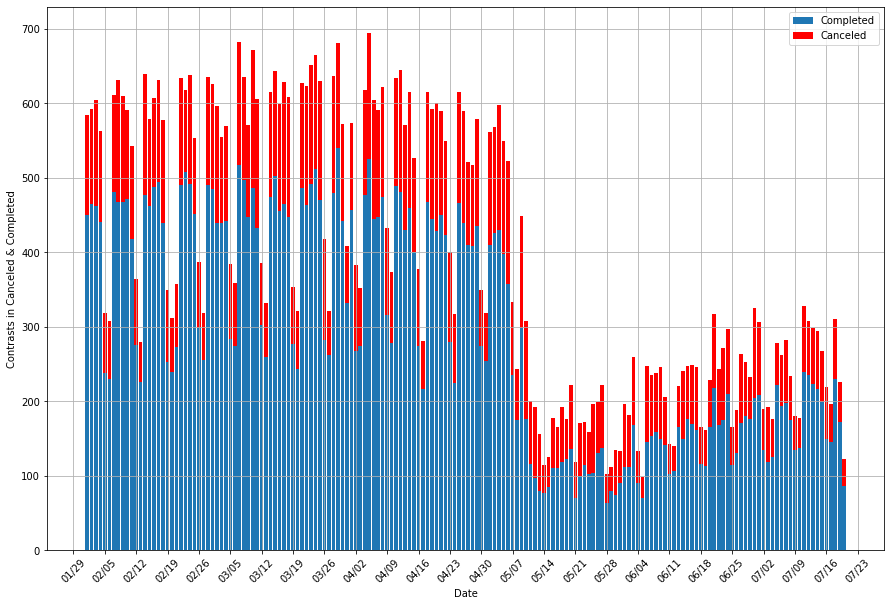

In [ ]:
#Completed per time
fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(df_da['Order Date'], df_da['Contrast'])
ax.bar(wos_can_da['Order Date'], wos_can_da['Contrast'], bottom=df_da['Contrast'],color='red')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt='%m/%d'))
ax.grid()
ax.set(xlabel = 'Date', 
       ylabel = 'Contrasts in Canceled & Completed')

plt.setp(ax.get_xticklabels(), rotation = 45)
ax.legend(['Completed','Canceled'])
plt.savefig('Number of wCon in time')
plt.show()

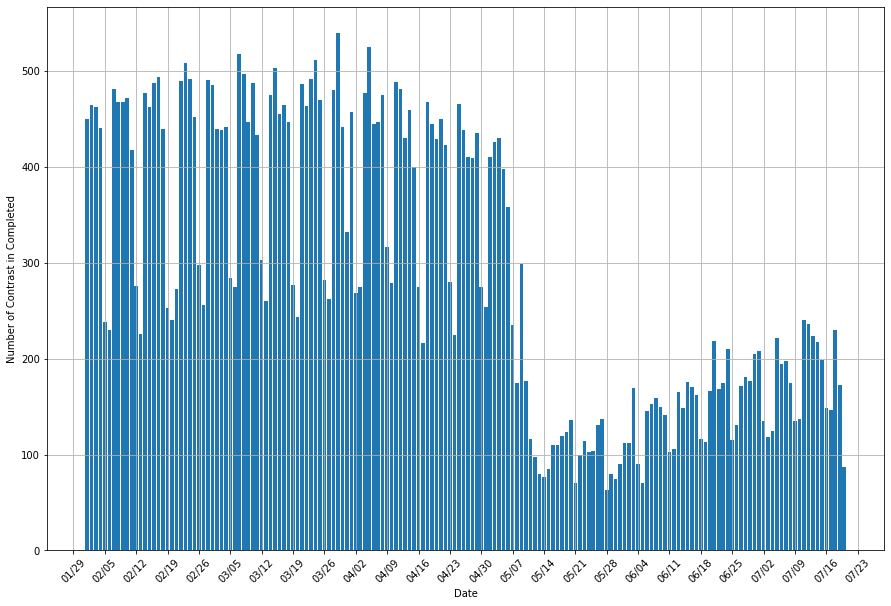

In [ ]:
#Completed per time
fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(df_da['Order Date'], df_da['Contrast'])

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt='%m/%d'))
ax.grid()
ax.set(xlabel = 'Date', 
       ylabel = 'Number of Contrast in Completed')

plt.setp(ax.get_xticklabels(), rotation = 45)
plt.savefig('Number of wCon in time-Comp')
plt.show()

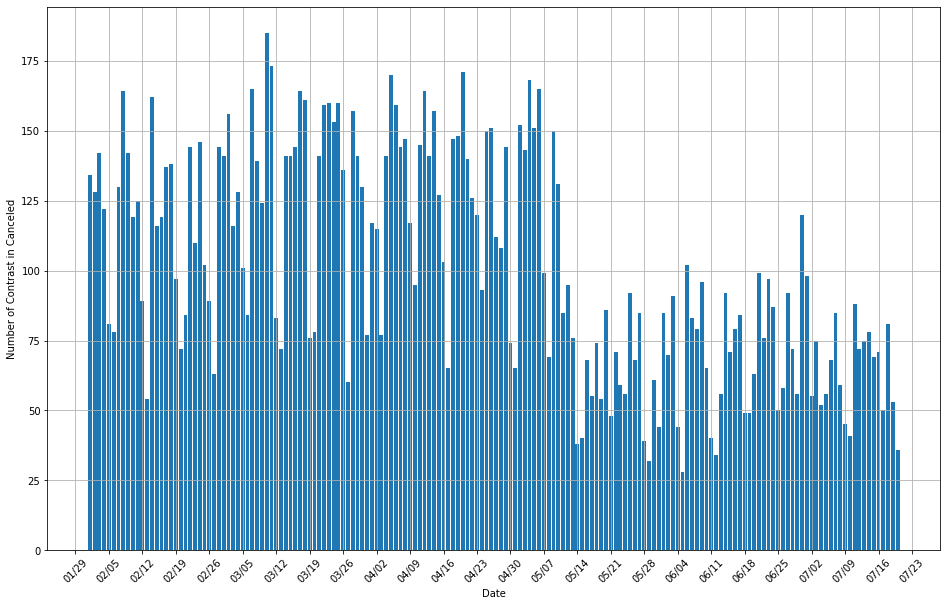

In [ ]:
#Canceled per time
fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(wos_can_da['Order Date'], wos_can_da['Contrast'])

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt='%m/%d'))
ax.grid()
ax.set(xlabel = 'Date', 
       ylabel = 'Number of Contrast in Canceled')

plt.setp(ax.get_xticklabels(), rotation = 45)
plt.savefig('Number of wCon in time-Canc')
plt.show()

# Dataframe with removing 2 Columns ('Patient Class 1','Patient Facility')

In [ ]:
#Dropping 2 cols
df1= df.drop(['Patient Class','Patient Facility'],1)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Order Status,Order ID,Procedure,Ordering Provider,Order Date,Age of Order,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
0,NaN,346106211,CT Abdomen Pelvis with and without contrast,John Thomas Martin,2022-02-09,161d 01h 21m,NaN,GV PRMCRE [1053001170],Outpatient,NaN,Primary Care,GOUVERNEUR HEALTHCARE,NaN,NaN,1
1,Completed,346498903,CT Chest with contrast,Nicholas Sanchez,2022-02-09,161d 00h 46m,NaN,BE PRMCRE [1020001170],Outpatient,NaN,Primary Care,BELLEVUE HOSPITAL CENTER,CT Chest with and without contrast,NaN,1
2,Completed,348151838,CT Angio Cerebral Perfusion with contrast,Shashank Agarwal,2022-02-01,168d 23h 37m,NaN,BE NRLGY [1020001140],Outpatient,NaN,Neurology,BELLEVUE HOSPITAL CENTER,CT Angio Cerebral Perfusion with and without c...,NaN,1
3,Completed,368046047,CT Angio Head with contrast,Shashank Agarwal,2022-02-01,168d 23h 37m,NaN,BE NRLGY [1020001140],Outpatient,NaN,Neurology,BELLEVUE HOSPITAL CENTER,CT Angio Head with and without contrast,NaN,1
4,Completed,368046050,CT Angio Neck with contrast,Shashank Agarwal,2022-02-01,168d 23h 37m,NaN,BE NRLGY [1020001140],Outpatient,NaN,Neurology,BELLEVUE HOSPITAL CENTER,CT Angio Neck with and without contrast,NaN,1


In [ ]:
df=df.dropna(0)
le = preprocessing.LabelEncoder()
df_en=df.apply(le.fit_transform)
df_en.loc[:, ['Order ID', 'Order Date','Age of Order','Contrast']] = df1[['Order ID', 'Order Date','Age of Order','Contrast']]
df_en.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


,Patient Class,Order Status,Order ID,Procedure,Ordering Provider,Order Date,Age of Order,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Patient Facility,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
1344,3,0,346103331,2,93,2022-02-09,161d 02h 46m,65,5,1,1,21,0,0,3,4,1
1403,3,0,346419168,2,497,2022-02-09,161d 00h 35m,1427,171,1,1,21,7,7,16,4,1


In [ ]:
df_en.describe()

,Patient Class,Order Status,Order ID,Procedure,Ordering Provider,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Patient Facility,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
count,2054.000000,2054.000000,2.054000e+03,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.0
mean,4.351022,0.000487,3.565604e+08,17.087634,577.723466,1026.500000,126.093963,1.034080,0.999513,21.143135,4.229309,4.229309,54.016553,3.498539,1.0
std,2.474213,0.022065,3.079658e+07,18.318849,338.090405,593.083046,73.020488,0.897476,0.022065,14.853005,3.170354,3.170354,45.572333,2.604419,0.0
min,0.000000,0.000000,3.428930e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3.000000,0.000000,3.491531e+08,2.000000,284.250000,513.250000,63.000000,0.000000,1.000000,9.000000,1.000000,1.000000,9.000000,0.000000,1.0
50%,3.000000,0.000000,3.588218e+08,12.000000,589.500000,1026.500000,120.000000,1.000000,1.000000,14.000000,4.000000,4.000000,53.000000,4.000000,1.0
75%,7.000000,0.000000,3.700023e+08,26.000000,878.000000,1539.750000,207.000000,2.000000,1.000000,33.000000,8.000000,8.000000,94.000000,6.000000,1.0
max,7.000000,1.000000,3.938552e+08,71.000000,1150.000000,2053.000000,258.000000,2.000000,1.000000,55.000000,11.000000,11.000000,173.000000,6.000000,1.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72163 entries, 0 to 72162
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order Status             67112 non-null  object        
 1   Order ID                 72163 non-null  int64         
 2   Procedure                72163 non-null  object        
 3   Ordering Provider        72163 non-null  object        
 4   Order Date               72163 non-null  datetime64[ns]
 5   Age of Order             72163 non-null  object        
 6   Accession #              50828 non-null  object        
 7   Ordering Dept            72163 non-null  object        
 8   Patient Class 2          72163 non-null  object        
 9   Study Status             45966 non-null  object        
 10  Dept Specialty           64201 non-null  object        
 11  Order Revenue Location   72163 non-null  object        
 12  Previous Procedure Name  4127 no

In [ ]:
#removing N/As
df2=df1.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 427 to 72105
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order Status             2060 non-null   object        
 1   Order ID                 2060 non-null   int64         
 2   Procedure                2060 non-null   object        
 3   Ordering Provider        2060 non-null   object        
 4   Order Date               2060 non-null   datetime64[ns]
 5   Age of Order             2060 non-null   object        
 6   Accession #              2060 non-null   object        
 7   Ordering Dept            2060 non-null   object        
 8   Patient Class 2          2060 non-null   object        
 9   Study Status             2060 non-null   object        
 10  Dept Specialty           2060 non-null   object        
 11  Order Revenue Location   2060 non-null   object        
 12  Previous Procedure Name  2060 n

In [ ]:
#Here we are encoding our catagorical variables and keep the price and odometer as they were
lei = preprocessing.LabelEncoder()
df1_en=df1.apply(lei.fit_transform)
df1_en.loc[:, ['Order ID', 'Order Date','Age of Order']] = df1[['Order ID', 'Order Date','Age of Order','Contrast']]
df1_en.head(2)

,Order Status,Order ID,Procedure,Ordering Provider,Order Date,Age of Order,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
0,3,346106211,3,2393,2022-02-09,161d 01h 21m,50828,222,2,5,59,21,242,12,0
1,1,346498903,94,3751,2022-02-09,161d 00h 46m,50828,69,2,5,59,0,131,12,0


In [ ]:
df1_en.describe()

,Order Status,Order ID,Procedure,Ordering Provider,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
count,72163.000000,7.216300e+04,72163.000000,72163.000000,72163.000000,72163.000000,72163.000000,72163.000000,72163.000000,72163.000000,72163.000000,72163.000000,72163.0
mean,0.908762,3.520942e+08,44.535524,2637.792705,32927.300112,290.768995,0.735876,3.744758,29.577235,19.110029,232.275280,6.102892,0.0
std,0.719851,4.420606e+07,54.557864,1570.416350,16915.852278,183.791573,0.861552,0.959518,23.157138,11.918516,42.504148,5.288101,0.0
min,0.000000,9.920540e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,3.486727e+08,3.000000,1252.000000,18040.500000,125.000000,0.000000,3.000000,14.000000,4.000000,242.000000,0.000000,0.0
50%,1.000000,3.587522e+08,27.000000,2647.000000,36081.000000,311.000000,0.000000,3.000000,14.000000,25.000000,242.000000,5.000000,0.0
75%,1.000000,3.699224e+08,63.000000,4009.000000,50828.000000,443.000000,2.000000,5.000000,39.000000,27.000000,242.000000,12.000000,0.0
max,3.000000,3.939663e+08,236.000000,5386.000000,50828.000000,638.000000,2.000000,5.000000,76.000000,38.000000,242.000000,12.000000,0.0


In [ ]:
#Most popular procedures with contrast
w1=w.dropna()
df_proc=w.groupby('Procedure')['Contrast'].agg(['count'])
df_pro=df_proc.reset_index('Procedure')
df_pro.sort_values('count',ascending=False,inplace=True)
df_pro.head(20)

,Procedure,count
2,CT Abdomen Pelvis with Omnipaque,15308
4,CT Abdomen Pelvis with contrast,11176
94,CT Chest with contrast,5179
63,CT Angio Pulmonary Embolism with Omnipaque,4193
92,CT Chest with Omnipaque,3940
3,CT Abdomen Pelvis with and without contrast,3425
57,CT Angio Neck with contrast,1749
30,CT Angio Chest with Omnipaque,1736
54,CT Angio Neck with Omnipaque,1605
41,CT Angio Head with contrast,1553


In [ ]:
#Locations with highest usage of contrast
df_loca=w.groupby('Order Revenue Location')['Contrast'].agg(['count'])
df_loc=df_loca.reset_index('Order Revenue Location')
ffff=df_loc.sort_values('count',ascending=False,inplace=True)
df_loc.head(15)

,Order Revenue Location,count
0,BELLEVUE HOSPITAL CENTER,13682
16,ELMHURST HOSPITAL CENTER,10700
26,KINGS COUNTY HOSPITAL CENTER,8832
27,LINCOLN MEDICAL CENTER,8573
25,JACOBI MEDICAL CENTER,8082
33,QUEENS HOSPITAL CENTER,6281
4,CONEY ISLAND HOSPITAL CENTER,5012
23,HARLEM HOSPITAL CENTER,3751
29,METROPOLITAN HOSPITAL CENTER,3252
38,WOODHULL MEDICAL CENTER,3114


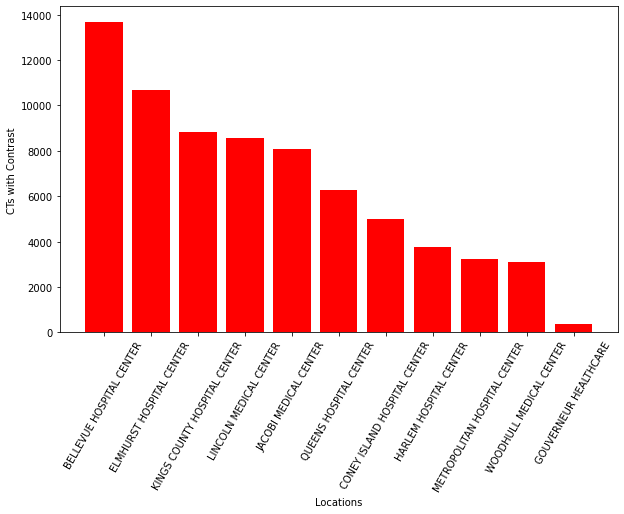

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df_loc['Order Revenue Location'].head(11), df_loc['count'].head(11),color='red')

# ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
# ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt='%m/%d'))

ax.set(xlabel = 'Locations', 
       ylabel = 'CTs with Contrast')

# plt.setp(ax.get_xticklabels())
# ax.invert_yaxis() 
plt.xticks(rotation=60)
plt.savefig('Number of wCon in locs(wNA)')
plt.show()

In [ ]:
#Departments with highest usage of contrast
df_loca=w1.groupby('Dept Specialty')['Contrast'].agg(['count'])
df_loc=df_loca.reset_index('Dept Specialty')
gggg=df_loc.sort_values('count',ascending=False,inplace=True)
df_loc.head(10)

,Dept Specialty,count
9,Emergency Medicine,763
42,Primary Care,246
21,Intensive Care,228
53,Urology,84
14,General Surgery,79
12,Gastroenterology,75
27,Obstetrics and Gynecology,64
24,Neurology,55
18,Hematology and Oncology,51
49,Surgical Intensive Care,38


In [ ]:
#Departments with highest usage of contrast
df_clas=w1.groupby('Patient Class 2')['Contrast'].agg(['count'])
df_cl=df_clas.reset_index('Patient Class 2')
gggg=df_cl.sort_values('count',ascending=False,inplace=True)
df_cl.head(10)

,Patient Class 2,count
2,Outpatient,863
0,Emergency,793
1,Inpatient,398


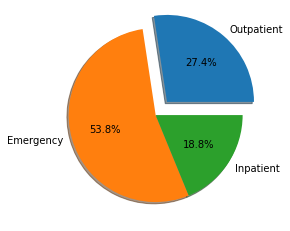

In [ ]:
y = np.array([19769, 38829, 13565])
mylabels = ["Outpatient", "Emergency", "Inpatient"]
myexplode = [0.2, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%', shadow = True)
plt.savefig("barplot-wCon")
plt.show() 

In [ ]:
#Building a dataframe based on date (each col shows the recurrence at each day) good for plotting binary vars
df_date=df1_en.groupby([df1_en['Order Date'].dt.date]).sum()
df_da=df_date.reset_index('Order Date')
df_da.head()

,Order Date,Order Status,Order ID,Procedure,Ordering Provider,Accession #,Ordering Dept,Patient Class 2,Study Status,Dept Specialty,Order Revenue Location,Previous Procedure Name,Addendum Text,Contrast
0,2022-02-01,540,203734119807,26427,1679881,19895298,177712,535,2385,19367,11553,140922,4116,0
1,2022-02-02,570,206549548344,26975,1725946,19984872,187497,542,2384,19198,12076,146469,4026,0
2,2022-02-03,568,212401383806,27831,1639105,20934326,187998,620,2453,21859,12138,146778,4376,0
3,2022-02-04,535,199012676241,25852,1505696,18905120,175171,497,2222,18979,11450,137681,3670,0
4,2022-02-05,238,104592615300,16045,843982,9584117,94358,75,1121,7858,6314,75905,1236,0


In [ ]:
#Building a dataframe based on date (each col shows the recurrence of type precedure)
df_proc=df1_en.groupby([df1_en['Procedure']]).sum()
df_pr=df_proc.reset_index('Procedure')

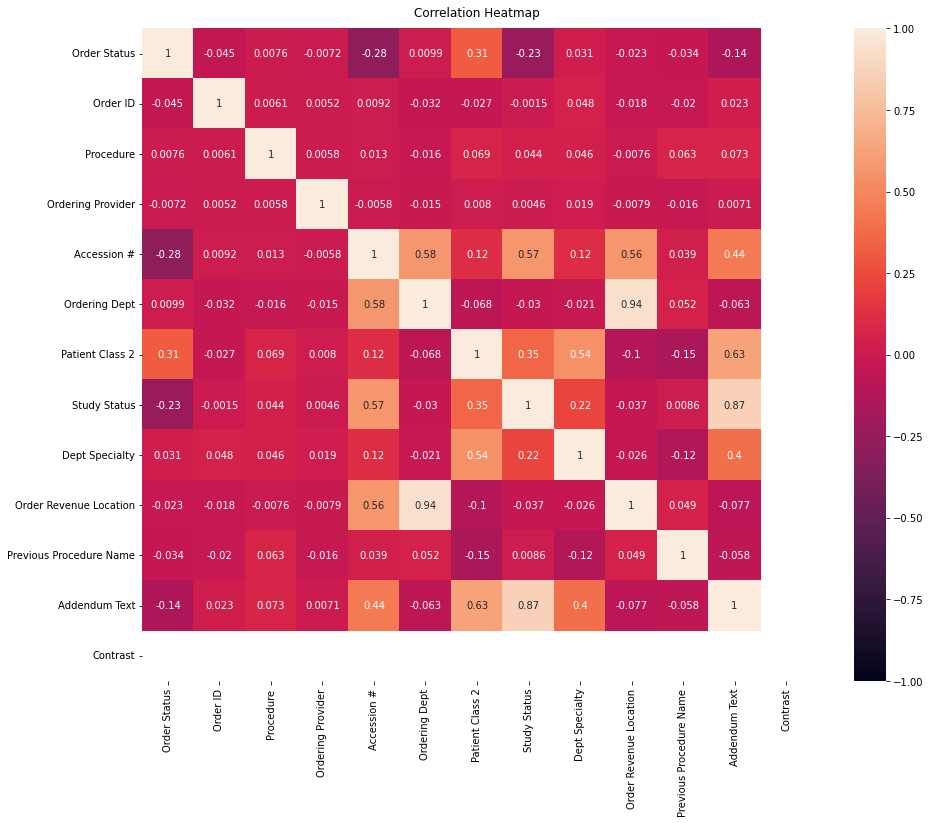

In [ ]:
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(df1_en.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig("Corr-HM-df1.png")